# Исследовательский анализ рынка общественного питания г.Москва.

- Автор: Агафонова Ольга
- Дата: 13.04.2025г.

**Цель проекта** - исследование и анализ развития заведений общественного питания Москвы для выбора лучших условий инвестирования в данную отрасль для фонда "Shut Up and Take My Money". 


**Задачи проекта:**


1. Загрузка данных и знакомство с содержимым;
2. Проведение предобработки данных;
3. Исследование и анализ исходных данных:
    - определить категории заведений и административных районов Москвы, представленных в данных;
    - изучить соотношение сетевых и несетевых заведений;
    - исследовать рейтинг заведений и количества посадочных мест;
    - выяснить, с какими данными показывают самую сильную корреляцию рейтинги заведений;
    - выявить топ-15 популярных сетей завдений в Москве;
    - изучить вариацию среднего чека заведения по столбцу `middle_avg_bill` в зависимости от района Москвы.
4. Формулировка выводов по проведённому анализу и рекомендаций для заказчика.

### Описание данных

В проектной работе будут использованы данные двух датасетов:
    
**1.** ***`/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания:***


* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * 0 — заведение не является сетевым;
    * 1 — заведение является сетевым.
* `seats` — количество посадочных мест.
    
**2.** ***`/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания:***
    
    
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»;
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

## Загрузка данных и знакомство с ними

- Загружаем файлы с данными о заведениях общественного питания Москвы: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем необходимые библиотеки:
import pandas as pd

# Библиотеки для визуализации данных:
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеку для работы с многомерными массивами:
import numpy as np

!pip install phik
# Библиотеку для расчёта коэффициента корреляции phi_k:
from phik import phik_matrix

In [2]:
import pandas; print(pandas.__version__)
import matplotlib; print(matplotlib.__version__)
import seaborn; print(seaborn.__version__)
import numpy; print(numpy.__version__)
import scipy; print(scipy.__version__)

1.3.4
3.4.3
0.11.2
1.21.1
1.9.1


In [3]:
!pip install pandas==1.3.4

In [4]:
!pip install matplotlib==3.4.3

In [5]:
!pip install seaborn==0.11.2

In [6]:
# Выгружаем данные из датасета rest_info.csv в датафрейм info:
df_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [7]:
# Выгружаем данные из датасета rest_price.csv в датафрейм price:
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [8]:
# Выводим информацию о датафрейме `df_info`:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [9]:
# Выводим первые строки датафрейма `df_info` на экран:
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
# Выводим информацию о датафрейме `df_price`:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [11]:
# Выводим первые строки датафрейма `df_price` на экран:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Сформируем промежуточный вывод относительно полученных данных:




**1. Датафрейм `df_info`** занимает объем оперативной памяти 591.2 КВ и содержит 8406 строк и 9 столбцов, в которых находится информация о заведениях общественного питания.

Изучим типы данных и их корректность.
В датасете представлены три типа данных: 


**Числовые значения с плавающей точкой (float64).** Два столбца представлены в данном типе: 

* `rating` - рейтинг заведения по оценкам пользователей. Тип данных float64 подходит для содержимого данного столбца, так как значение может быть дробным числом.
* `seats` - содержит информацию о количестве посадочных мест. Здесь вещественный тип данных не является корректным, так как значения представлены в виде целых числе. Данные столбца необходимо привести к типу данных int64. 

**Строковые данные (object).** Шесть столбцов имеют тип данных object:

* `id`, `name`, `category`, `address`, `district`, `hours` - столбцы имеют строковые значения (object), что вполне соответствует их содержимому: буквенное или буквенно-численное. 

**Целочисленные значения (int64).** Один столбец с данным типом:

* `chain` - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым. Тип данных int64 является типичным для значений данного столбца.

Проанализировав типы данных видно, что все столбцы представлены корректно, кроме столбца `seats`, который удобней будет привести к целочисленному типу данных. Так же, отметим, что в столбцах `hours` и `seats` присутствуют пропуски.

**2. Обратимся к датафрейму `df_price`**, который занимает 158.6 КВ объема оперативной памяти и содержит 4058 строк и 5 столбцов, в которых информация о среднем чеке в заведениях общественного питания.

По аналогии с предыдущим датасетом можно отметить, что данные датафрейма представлены в двух типах: 


**Числовые значения с плавающей точкой (float64).** Два столбца представлены в данном типе: 

* `middle_avg_bill`, `middle_coffee_cup` - числа с оценкой среднего чека и одной чашки капучино соответственно. Тип данных float64 подходит для содержимого данных столбцов, так как их значения могут быть дробными числами.

**Строковые данные (object).** Три столбца имеют тип данных object:

* `id`, `price`, `avg_bill` - столбцы имеют строковые значения (object), что вполне соответствует их содержимому: буквенное или буквенно-численное. 

Изучив типы данных видно, что все столбцы представлены корректно. Заметим, что в большинстве столбцов присутствуют пропуски, а именно: `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`.


***Пропущенным значениям в датасетах необходимо уделить особое внимание, а так же проверить и другие столбцы, в которых могут встречаться значения-индикаторы, указывающие на отсутствие данных.*** 

Кроме того, отметим, что названия столбцов датафреймов прописаны в соответствии стилю **snake case** - в нижнем регистре с разделением слов подчеркиваниями вместо пробелов.

Судя по первому знакомству с данными датасетов, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым и продолжим работу.

In [12]:
# Для объединения датафреймов воспользуемся методом merge(), 
# где объединение будет по столбцу 'id', а тип присоединения будет 'left', чтобы сохранить число всех заведений:
df = pd.merge(df_info, df_price, on='id', how='left')
print(df.shape)


(8406, 13)


* Получили датафрейм `df`, содержащий 8406 строк и 13 столбцов.

## Предобработка данных

Подготовим данные к исследовательскому анализу:

- На основании вышеизложенного вывода - названия столбцов датафрейма указаны корректно, а типы данных не нуждаются в преобразовании, кроме столбца `seats`, который необходимо привести к целочисленному типу данных. Также следует обратить внимание на размерность числовых столбцов (тип данных 'int64' и 'float64'), которую следует оптимизировать (уменьшить). 

In [13]:
# Преобразуем данные столбца 'seats' типа float64 в целочисленный тип данных (Int64),  
# оставив пропущенные значения без изменений (как NaN):
df['seats'] = df['seats'].astype('Int16')

df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


In [14]:
# Оптимизируем размерность столбцов датафрейма 'df'с целочисленным типом данных, 
# используя метод to_numeric():

df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
    
# Проверим типы данных в столбце датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int16(1), float64(3), int8(1), object(8)
memory usage: 820.9+ KB


In [15]:
# Аналогично, оптимизируем размерность столбцов датафрейма 'df'с вещественным типом данных методом to_numeric(). 
# Зададим цикл:

for column in ['rating','middle_avg_bill','middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column],
                                    downcast='float')
    
# Проверим типы данных в датафрейме 'df':
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: Int16(1), float32(3), int8(1), object(8)
memory usage: 722.4+ KB


**Подитожим:**

Оптимизированный датафрейм 'df' имеет объем оперативной памяти 722.4 КВ, содержит 8406 строк и 13 столбцов со следующими типами данных: 'float32'(3 столбца), 'Int16'(1), 'int8'(1) и 'object'(8).

- Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейма, изучим данные с пропущенными значениями и предположим гипотезы их появления. Проведём обработку пропущенных значений: например, заменим пропуски на определённые значения или удалим строки с пропусками, или оставим их как есть.

Считаем количество пропусков в каждом столбце датафрейма 'df' в абсолютных и относительных значениях.

In [16]:
# Выводим абсолютное значение пропусков в столбцах датафрейма с помощью метода isna():
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Обозначим столбцы, содержащие пропущенные значения: `hours`- **536**, `seats` - **3611**, `price` - **5091**, `avg_bill` - **4590**, `middle_avg_bill` - **5257**, `middle_coffee_cup` - **7871**.

In [17]:
# Определим относительное значение пропусков (долю от общего числа строк):
df.isna().mean()*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

**Анализируя столбцы с пропущенными значениями, можно сделать предварительный вывод:**

1. Пропуски в столбце `hours`, вероятней всего, случайны. Причиной их возникновения, могут быть, например, временное отсутствие информации о часах работы в связи с недавно начатой работой заведения, информация о котором еще не польностью внесена на сайт, либо проведение обновления информации о заведениях на сайте, которое выполнилось с ошибкой, что повлекло пропуски, либо человеческий фактор - информацию о времени работы заведения просто не внесли на сайт. Тип данных пропусков, предположительно, MAR. Они составляют, примерно, 6%. Так как мы имеем дело со строковым столбцом, где пропуски NaN больше характерны для типа данных 'float64', пропущенные значения здесь можно заменить словосочетанием 'Нет данных'.


2. Подобные предположения относятся и к пропускам в столбцах `price` и `avg_bill`. Кроме того, касательно столбца `price`, возможно, в некоторых заведениях с отсутствующими рейтингами уровня цен вообще не проводилась данная оценка, поэтому это может быть причиной отсутствия данного параметра. Так же, и в столбце `avg_bill` - диапазоны со средними ценами либо не предусмотрны, либо не обозначены. Пропуски в данных столбцах составляют более 60% и 54% соответственно. Так же заменим их текстовыми зачениями, например, 'Без категории' или 'Нет данных'.  


3. Пропущенные значения в столбцах `middle_avg_bill` и `middle_coffee_cup` напрямую зависят от определенных данных в столбце `avg_bill`. Их доля в общем количестве строк составляет, примерно, 63% и 94% соответственно. Пропуски здесь не случайны, определяются типом MNAR. Столбцы имеют вещественный тип данных, поэтому пропуски можно заполнить или проигнорировать. Но здесь, я считаю, будет уместным оставить их без изменений, так как подобрать нужные значения не представляется возможным.


4. Отдельно отметим пропуски в столбце `seats`, доля которых составляет 43%. Причины возникновения данных пропусков аналогичны гипотезе о пропусках в столбце `hours`. Данные пропуски также отнесем к MAR и оставим без изменений, так как специальные значения, например "-1" или "0", которыми мы здесь можем заменить пропуски, в дальнейшем могут исказить результаты исследования. 


* Проведём работу над пропусками. 

In [18]:
# Заменим пропущенные значения в строковых столбцах `hours`, `price` и `avg_bill` на условное значение "Нет данных":
df[['hours', 'price', 'avg_bill']] = df[['hours', 'price', 'avg_bill']].fillna('Нет данных')

# Выведем результат:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,Нет данных,Нет данных,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,Нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


Убедимся в отсутствии пропусков в столбцах датафрейма, кроме `middle_avg_bill`, `seats` и `middle_coffee_cup`.

In [19]:
# Выведем итоговый результат:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

- Проверим данные на **явные и неявные дубликаты**. Для оптимизации проверки проведём нормализацию данных в текстовых столбцах.

In [20]:
# Приведем текстовые данные столбцов `name` и `address` к верхнему регистру с помощью метода str.upper()
# и избавимся от возможных пробелов в строке методом str.strip():
df['name'] = df['name'].str.upper().str.strip()
df['address'] = df['address'].str.upper().str.strip()
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,Нет данных,Нет данных,NaN,NaN
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,Нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


In [21]:
# Нормализуем текстовые значения столбцов `category`, `district`, `hours`, `price` и `avg_bill` 
# к нижнему регистру, используя метод str.lower():
df['category'] = df['category'].str.lower().str.strip()
df['district'] = df['district'].str.lower().str.strip()
df['hours'] = df['hours'].str.lower().str.strip()
df['price'] = df['price'].str.lower().str.strip()
df['avg_bill'] = df['avg_bill'].str.lower().str.strip()
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,нет данных,нет данных,NaN,NaN
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,нет данных,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500.0,NaN


Проанализируем поочередно все уникальные значения столбцов `name`, `address`, `category`, `district`, `hours`, `price` и `avg_bill`, используя методы unique() и nunique() на выявление неявных дубликатов.


In [22]:
# Посчитаем количество уникальных значений столбца `name` в переменной unique_name_count:
unique_name_count = df['name'].nunique()
unique_address_count = df['address'].nunique()
unique_category_count = df['category'].nunique()
unique_district_count = df['district'].nunique()
unique_hours_count = df['hours'].nunique()
unique_price_count = df['price'].nunique()
unique_avg_bill_count = df['avg_bill'].nunique()

print(f'Количество уникальных строк в столбце name: {unique_name_count}')
print(f'Количество уникальных строк в столбце address: {unique_address_count}')
print(f'Количество уникальных строк в столбце category: {unique_category_count}')
print(f'Количество уникальных строк в столбце district: {unique_district_count}')
print(f'Количество уникальных строк в столбце hours: {unique_hours_count}')
print(f'Количество уникальных строк в столбце price: {unique_price_count}')
print(f'Количество уникальных строк в столбце avg_bill: {unique_avg_bill_count}')

Количество уникальных строк в столбце name: 5512
Количество уникальных строк в столбце address: 5752
Количество уникальных строк в столбце category: 8
Количество уникальных строк в столбце district: 9
Количество уникальных строк в столбце hours: 1308
Количество уникальных строк в столбце price: 5
Количество уникальных строк в столбце avg_bill: 898


Учитывая полученное количество уникальных строк в столбцах: `name`, `address`, `hours` и `avg_bill`, выгружать и анализировать данные столбцов не представляется возможным. Выгрузим и проанализилуем массив уникальных значений столбцов `category`, `district` и `price` с помощью метода unique(). 

In [23]:
# Выведем все уникальные данные столбца `category` в переменной unique_category:
unique_category = df['category'].unique()

print(unique_category)

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


In [24]:
# Выгрузим все уникальные значения столбца `district` в переменной unique_district:
unique_district = df['district'].unique()

print(unique_district)

['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']


In [25]:
# Сформируем массив уникальных значений столбца `price` в переменной unique_price:
unique_price = df['price'].unique()

print(unique_price)

['нет данных' 'выше среднего' 'средние' 'высокие' 'низкие']


Категория заведений и адрес заведений выглядят уникальными, замена значений не требуется.

А вот названия категорий цен в столбце `price` можно привести к единому стилю. Например, значение ***'высокие'*** заменить на ***'выше среднего'***, а ***'низкие'*** - на ***'ниже среднего'***. 

In [26]:
# С помощью метода str.replace() внесём необходимые изменения в столбец `price`:
df['price'] = df['price'].str.replace('высокие', 'выше среднего')
df['price'] = df['price'].str.replace('низкие', 'ниже среднего')
# Получим результат
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,нет данных,нет данных,NaN,NaN
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,нет данных,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,СУШИ МАНИЯ,кафе,"МОСКВА, ПРОФСОЮЗНАЯ УЛИЦА, 56",юго-западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,нет данных,нет данных,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,МИСЛАВНЕС,кафе,"МОСКВА, ПРОЛЕТАРСКИЙ ПРОСПЕКТ, 19, КОРП. 1",южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,нет данных,нет данных,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,САМОВАР,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",юго-восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,нет данных,средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,ЧАЙХАНА SABR,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",юго-восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,нет данных,нет данных,NaN,NaN


In [27]:
# Проверим результат:
unique_price = df['price'].unique()

print(unique_price)

['нет данных' 'выше среднего' 'средние' 'ниже среднего']


Работа по выявлению **неявных** дубликатов проведена. Перейдём к устранению **явных** дубликатов в данных.

In [28]:
# Посчитаем количество строк до удаления дубликатов с помощью метода shape[0] и результат сохраним 
# в переменную initial_row_count:
initial_row_count = df.shape[0]

# Сортируем датафрейм по всем столбцам, используя метод sort_values():
df_sorted = df.sort_values(by=list(df.columns))

# Определим количество дубликатов методом duplicated():
duplicates = df_sorted[df_sorted.duplicated()].shape[0]

# Проведем удаление дубликатов в переменной df_no_duplicates с помощью метода drop_duplicates():
df_no_duplicates = df_sorted.drop_duplicates()

# Сохраним количество строк после удаления дубликатов в переменной final_row_count:
final_row_count = df_no_duplicates.shape[0]

# Выведем результат:
print(f'Количество строк до удаления дубликатов:{initial_row_count}')
print(f'Количество найденных дубликатов:{duplicates}')
print(f'Количество строк после удаления дубликатов:{final_row_count}')

Количество строк до удаления дубликатов:8406
Количество найденных дубликатов:0
Количество строк после удаления дубликатов:8406


На первый взгляд, явных дубликатов нет, но проверим столбцы `name` и `address` в отдельной связке, где, вероятней всего, дублирующие значения могут быть. 

In [29]:
# В переменной duplicat сохраняем найденное количество дубликатов по данным столбцам:
duplicat = df.loc[df.duplicated(subset=['name','address'], keep=False)].shape[0]

# Сортируем датафрейм по всем столбцам:
sorted_df = df.sort_values(by=list(df.columns))

# Удаляем дубликаты:
new_df = sorted_df.drop_duplicates(subset=['name','address'])

# Выведем количество строк после удаления дубликатов:
final_df = new_df.shape[0]

# Результат выведем на экран:

print(f'Исходное количесвто строк: {initial_row_count}')
print(f'Количество найденных дубликатов: {duplicat}')
print(f'Количесвто строк после удаления дубликатов: {final_df}')

Исходное количесвто строк: 8406
Количество найденных дубликатов: 8
Количесвто строк после удаления дубликатов: 8402


**Исходя из проведенных вычислений, сделаем вывод:**

1. Для определения количества дубликатов была проведена сортировка даных по всем столбцам. Далее, с помощью метода duplicated() выявили, что дубликаты по всему датафрейму отсутствуют, **но в связке столбцов `name` и `address` их нашлось 4 строки**. 
2. Явные дубликаты в данных столбцах удалены с помощью метода drop_duplicates().

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [30]:
import warnings
warnings.simplefilter(action='ignore')

# Создадим пустой список, который будем наполнять нужными значениями:
is_24_7 = []

# Зададим цикл, который рнёт значение True в случае ежедневной и круглосуточной
# работы заведения и False - в обратном случае:
for  hours in new_df['hours']:
    if hours=='ежедневно, круглосуточно':
        is_24_7.append('True')
    else:
        is_24_7.append('False')
        
# Добавим в датафрейм новый столбец `is_24_7`, которому присвоим список:
new_df['is_24_7'] = is_24_7

# Выведем результат:
new_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
61,0009f005d6fb47c6b067db5084f4e05a,КАФЕ ЛОЗА,ресторан,"МОСКВА, ЧЕРЕПОВЕЦКАЯ УЛИЦА, 4А",северо-восточный административный округ,"ежедневно, круглосуточно",4.2,0,85,средние,средний счёт:500–800 ₽,650.0,NaN,True
3414,000c4f8e2c6b4a8e81127ed094688658,ДОБРОЛАВКА,кофейня,"МОСКВА, СТОЛЯРНЫЙ ПЕРЕУЛОК, 3К13",центральный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.4,0,<NA>,средние,цена чашки капучино:150–190 ₽,NaN,170.0,False
2581,0028eb1543284e18a0acdb0343a66107,КАФЕ БУЛЬВАР. ШАШЛЫК-СИТИ,кафе,"МОСКВА, 7-Я ПАРКОВАЯ УЛИЦА, 15, СТР. 3",восточный административный округ,"ежедневно, 11:00–00:00",4.3,0,<NA>,нет данных,нет данных,NaN,NaN,False
6866,002a2a1a30b84ad1883408ad5cec661f,БУЛОШНАЯ,кофейня,"МОСКВА, НОВОЧЕРЁМУШКИНСКАЯ УЛИЦА, 58",юго-западный административный округ,"ежедневно, 09:00–22:00",4.4,1,20,нет данных,нет данных,NaN,NaN,False
2314,002c7e0b7c294daf944229bc10597566,J&J CAFE MOSCOW,кофейня,"МОСКВА, ВЕРХНЯЯ КРАСНОСЕЛЬСКАЯ УЛИЦА, 16",центральный административный округ,пн-пт 09:00–18:00,4.1,0,<NA>,средние,цена чашки капучино:170–250 ₽,NaN,210.0,False


In [31]:
# Выведем итоговый датафрейм:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 61 to 1634
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   Int16  
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  is_24_7            8402 non-null   object 
dtypes: Int16(1), float32(3), int8(1), object(9)
memory usage: 787.7+ KB


---

### Промежуточный вывод


**Процесс оптимизации данных завершен. В итоге, получена следующая информация:**

1. Общее количество строк датафрейма - 8402 и 14 столбцов, из которых, после процесса оптимизации размерности данных, 9 столбцов с типом данных 'object', 3 столбца - 'float32', 2 столбца с целочисленным типом данных - 'Int16' и 'int8'.


2. Все столбцы по стилю и содержанию представлены корректно, кроме столбца `seats`, который логично было преобразовать в тип данных 'Int16', сохранив при этом пропуски, которые не повлияют на дальнейший анализ.


3. В процессе предобработки данных датарейма всего было обнаржено 26956 пропущенных значений, с которыми была проведена следующая работа:
* в строковых столбцах `hours`, `price` и `avg_bill` - пропуски заменены текстовым значением "Нет данных";
* в столбцах `midlle_avg_bill`, `midlle_coffee_cup` и `seats` с типом данных 'float32' и 'Int16' пропущенные значения оставлены без изменения.


4. Также была проведена работа по выявлению явных и неявных дубликатов, в ходе которой были проведены преобразования ряда строк датафрейма относительно анализа неявных дубликатов и удалено 4 строки с явными дубликатами.


5. Кроме того, в датафрейм был добавлен новый строковый столбец `is_24_7`, который информирует о наличие ежедневной и круглосуточной работы заведений.


6. Таким образом, для дальнейшего корректного анализа данных над строками были проведены все необходимые преобразования. 

## Исследовательский анализ данных


Проведём исследовательский анализ исходных данных, используя визуальзации и сводные массивы данных.


---

### Задача 1

Исследуем количество объектов общественного питания относительно их категорий, которые, исходя из предыдущего анализа данных, представлены следующими значениями: 'кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание',
 'булочная' и 'столовая'. Результат сопроводим визуализацией.

In [32]:
# Выведем количество заведений по категориям методом value_counts():
new_df['category'].value_counts()

кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [33]:
# Выведем долю заведений по категориям относительно общего количества:
round((new_df['category'].value_counts(normalize=True)*100), 1)

кафе               28.3
ресторан           24.3
кофейня            16.8
бар,паб             9.1
пиццерия            7.5
быстрое питание     7.2
столовая            3.7
булочная            3.0
Name: category, dtype: float64

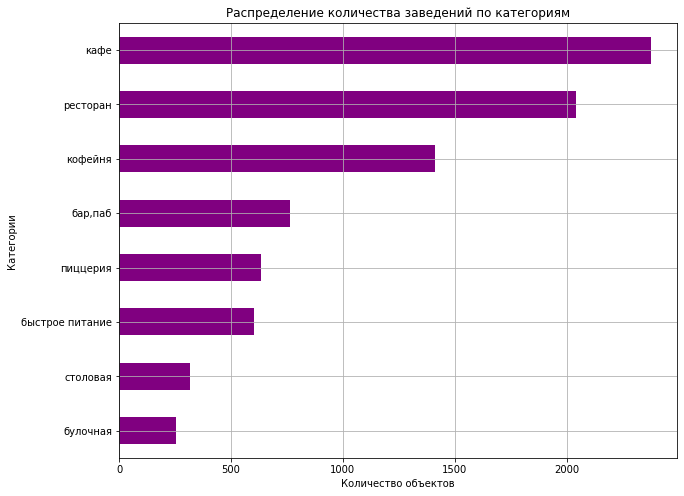

In [34]:
# Используем столбчатую диаграмму для визуализации распределения количества заведений по категориям с помощью метода plot():
new_df['category'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Распределение количества заведений по категориям',
                legend=False, ylabel='Количество объектов', xlabel='Категории', rot=0,
                color='purple', figsize=(10, 8))
plt.xlabel('Количество объектов')
plt.grid()
plt.show()

*Видно, что основную нишу заведений общественного питания занимают **кафе** и **рестораны**. Также, среди посетителей популярны **кофейни**.*

---

### Задача 2

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим визуализациями.

In [35]:
# Выведем количество заведений по административным районам Москвы:
new_df['district'].value_counts()

центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: district, dtype: int64

In [36]:
# Вычислим их долю относительно общего количества заведений:
round((new_df['district'].value_counts(normalize=True)*100), 1)

центральный административный округ         26.7
северный административный округ            10.7
южный административный округ               10.6
северо-восточный административный округ    10.6
западный административный округ            10.1
восточный административный округ            9.5
юго-восточный административный округ        8.5
юго-западный административный округ         8.4
северо-западный административный округ      4.9
Name: district, dtype: float64

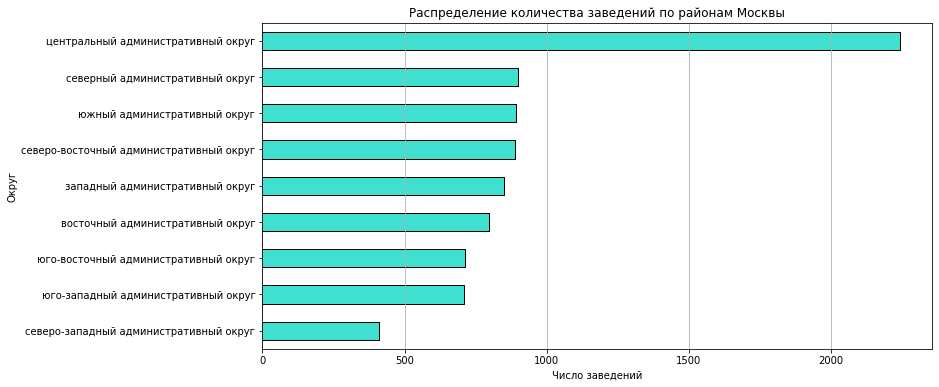

In [37]:
# Создадим столбчатый график для визуализации распределения количества заведений по административным округам Москвы, 
# используя метод plot():
new_df['district'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Распределение количества заведений по районам Москвы',
                legend=False, ylabel='Количество', xlabel='Округ', rot=0,
                color='turquoise', edgecolor='black', figsize=(12, 6))
plt.xlabel('Число заведений')
plt.grid(axis='x')
plt.show()

*На графике и по расчетам видно, что основное количество заведений общественного питания находятся в **Центральном округе Москвы**. Распределение количества объектов общественного питания в других районах Москвы, примерно, на одном уровне. В **Северо-Западном районе находится меньше всего заведений общепита**.*

***Рассмотрим подробней распределение заведений по каждой категории в Центральном районе г.Москва.***

In [38]:
# Определим число заведений общественного питания в зависимости от категории в Центральном округе:
new_df[new_df['district']=='центральный административный округ']['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

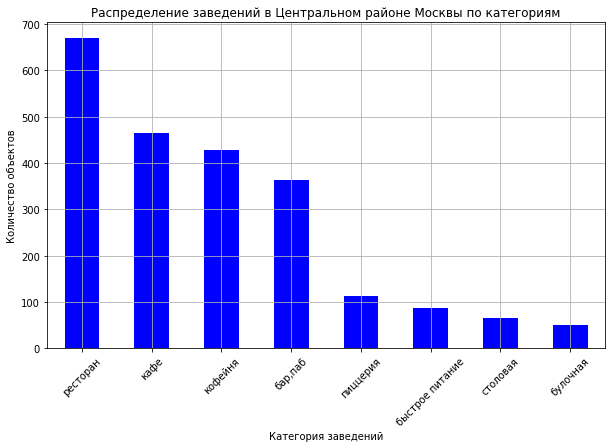

In [39]:
# Строим диаграмму с помощью метода plot():
new_df[new_df['district']=='центральный административный округ']['category'].value_counts().plot(kind='bar', 
                title='Распределение заведений в Центральном районе Москвы по категориям', 
                ylabel='Количество объектов', xlabel='Категория заведений',
                legend=False, rot=45, color='blue', figsize=(10, 6))
plt.grid()
plt.show()

*Без труда можно определить, что лидирующую позицию в Центральном районе занимают заведения высокой кухни - **рестораны**. Также, в этот округе пользуются спросом кафе, кофейни и бары-пабы.* 

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Определим, каких заведений больше — сетевых или несетевых и какие категории заведений чаще являются сетевыми. Исследуем данные и построим необходимые визуализации.

In [40]:
# С помощью математических действий сосчитаем количество сетевых и несетевых заведений, 
# исходя из бщего количества строк - 8406:
chain_object = new_df['chain'].sum()
not_chain = 8406-new_df['chain'].sum()

print(f'Количество сетевых заведений: {chain_object}')
print(f'Количество несетевых заведений: {not_chain}')

Количество сетевых заведений: 3204
Количество несетевых заведений: 5202


In [41]:
# Вычислим их относительные значения:
chain_object = round((new_df['chain'].value_counts(normalize=True)*100), 1)
display(chain_object) 


0    61.9
1    38.1
Name: chain, dtype: float64

В целом, можно определить, что соотношение сетевых и несетевых заведений составляет 38% к 62% соответственно, то есть, примерно, 1 к 2.  Рассмотрим визуально соотношение данных типов заведений в общем и в разрезе категорий.

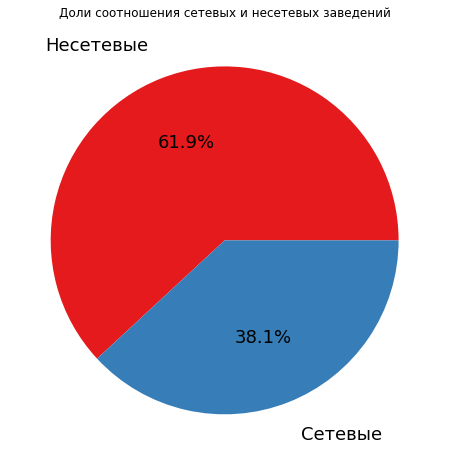

In [42]:
# Создадим круговую диаграмму ('pie'), 
# которая в целом покажет соотношение сетевых и несетевых объектов:
colors = sns.color_palette('Set1')
labels = ['Несетевые', 'Сетевые']
plt.pie(chain_object, labels=labels, colors=colors, autopct='%1.1f%%', 
        labeldistance=1.2, textprops={'fontsize': 18})
plt.title('Доли соотношения сетевых и несетевых заведений')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [43]:
# Создадим функцию 'plot_category_by_chain', которая покажет сравнение 
# количества сетевых и несетевых заведений по столбцу `chain` в зависимости от категорий. 
# Используем функцию sns.countplot():
def plot_category_by_chain(data, column, order=None, location='best'):
    plt.figure(figsize=[12, 6])
    ax = sns.countplot(x=column, hue='chain', data=data, order=order)
    plt.title('Число сетевых и несетевых заведений в разрезе категорий')
    plt.xlabel('Категории')
    plt.ylabel('Количество')
    plt.legend(['Несетевые', 'Сетевые'], loc=location, title='chain')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

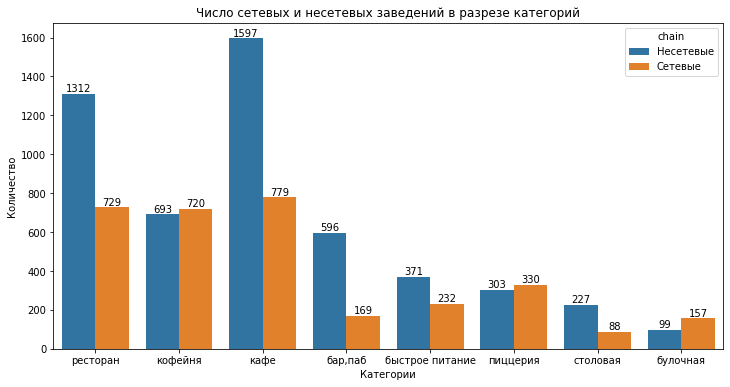

In [44]:
plot_category_by_chain(new_df, 'category')

*Судя по распределению количества сетевых и несетевых заведений на графике в зависимости от категории, видно, что, практически, во всех категориях преобладает число несетевых объектов. Только кофейни, пиццерии и булочные, как сетевые заведения, лидируют с небольшим отрывом.*

Выведем данные о соотношении сетевых и несетевых заведений относительно категории в относительных значениях. 

In [45]:
# Проведём математические рассчеты, используя группировку по столбцу 'category', если это сеть:
round((new_df[new_df['chain']==1]['category'].value_counts() / new_df['category'].value_counts())*100, 1).sort_values(ascending=False)


булочная           61.3
пиццерия           52.1
кофейня            51.0
быстрое питание    38.5
ресторан           35.7
кафе               32.8
столовая           27.9
бар,паб            22.1
Name: category, dtype: float64

***Булочные, пиццерии и кофейни, обычно, принадлежат к сети заведений.***

In [46]:
# Проведём математические рассчеты, используя группировку по столбцу 'category', если это несетевые объекты:
round((new_df[new_df['chain']==0]['category'].value_counts() / new_df['category'].value_counts())*100, 1).sort_values(ascending=False)

бар,паб            77.9
столовая           72.1
кафе               67.2
ресторан           64.3
быстрое питание    61.5
кофейня            49.0
пиццерия           47.9
булочная           38.7
Name: category, dtype: float64

***Чаще, несетевыми заведениями являются кафе, рестораны и бары/пабы.***

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Определим наличие в данных аномальных значений и выбросов, а также причину их возникновения. Приведём для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат  визуализируем.

In [47]:
# Изучаеим статистические показатели столбца `seats`:
print('Статистические показатели столбца seats:')
new_df['seats'].describe() 

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

По полученным данным можно сделать следующий вывод:
* Количество посадочных мест, без учета пропусков, 4795.
* По значению стандартного отклонения можно сказать, что данные имеют большую изменчивость.
* Отличие значений медианы и среднего говорит о наличие выбросов в выборке.
* Основное количество посадочных мест находится в диапазоне от 40 до 140.


Детальней выборку данных стоит рассмотреть с помощью диаграммы размаха. Для определения выбросов и аномальных значений.

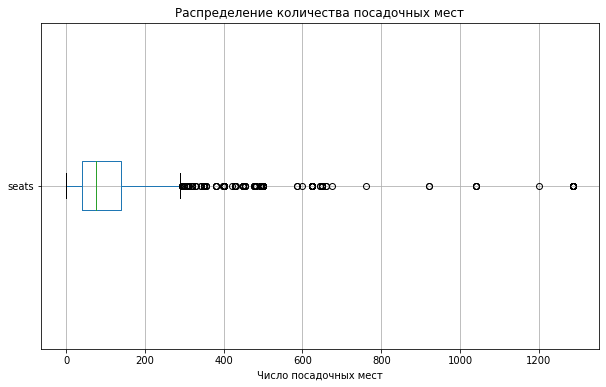

In [48]:
# Построим "ящик с усами":
boxplot=new_df.boxplot('seats', vert=False, figsize=(10,6))
boxplot.set_title('Распределение количества посадочных мест')
boxplot.set_xlabel('Число посадочных мест')

plt.show()

*Видно, что на графике присутствуют выбросы. Наблюдающий максимум числа посадочных мест приходится, примерно, на значение 300, остальное - возможные выбросы.*

Обратим внимание на полученные выбросы и прежде чем их удалять, необходимо понять - являются ли они значениями естественной вариативности или аномальными значениями. Для этого построим гистограмму распределения и проведём расчеты.


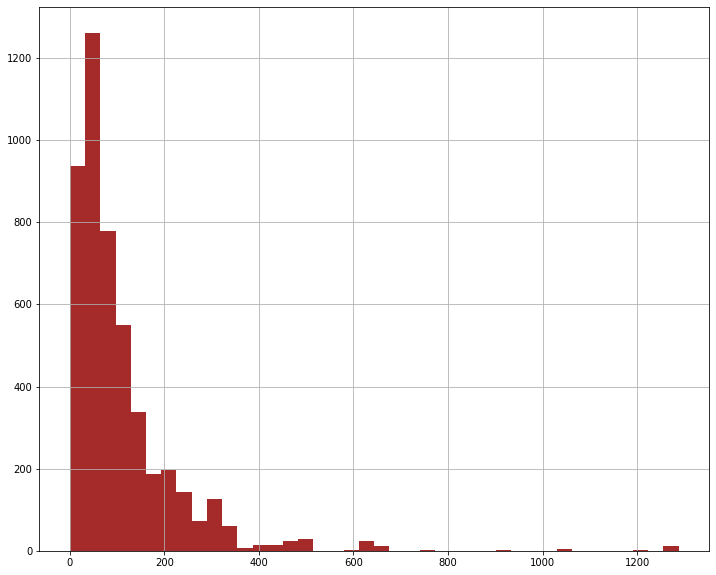

In [49]:
# Строим гистограмму по столбцу `seats`:
new_df['seats'].hist(figsize=(12,10), color='brown', bins=40)
plt.show()


*По гистограмме видно, что распределение асимметричное с правым "хвостом". Также определяются предположительные выбросы, начиная, примерно, со значения 600. Проведём вычисления.
Определим количество посадочных мест и их среднее значение по категориям заведений, а также с помощью 99-го процентиля выведем значение, которое будет являться аномальным для данной выборки.*


In [50]:
# Считаем общее число посадочных мест с группировкой по категориям:
df_agg = new_df.groupby('category')['seats'].agg('count')

print(df_agg.sort_values(ascending=False))

category
ресторан           1268
кафе               1217
кофейня             751
бар,паб             468
пиццерия            427
быстрое питание     349
столовая            164
булочная            148
Name: seats, dtype: int64


In [51]:
# Считаем среднее количество посадочных мест с группировкой по категориям:
df_agg = round((new_df.groupby('category')['seats'].agg('mean')), 0)

print(df_agg.sort_values(ascending=False))

category
бар,паб            125.0
ресторан           122.0
кофейня            111.0
столовая           100.0
быстрое питание     99.0
кафе                97.0
пиццерия            94.0
булочная            89.0
Name: seats, dtype: Float64


In [52]:
# Считаем медианное количество (устойчиво к выбросам) посадочных мест с группировкой по категориям:
df_agg = round((new_df.groupby('category')['seats'].median()), 0)

print(df_agg.sort_values(ascending=False))

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           76.0
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: Float64


In [53]:
# Сохраним значение 99-го процентиля в переменной 'no_emissions', используя метод quantile():
no_emissions = new_df['seats'].quantile(0.99)
print(no_emissions)

625


Обратим внимание на общее число посадочных мест и их медианное значение по категориям заведений. Получается, что 625 нетипично для количества посадочных мест заведений общественного питания Москвы, даже для тех, которые рассчитанны на большое количество клиентов. Я предполагаю, что причиной возникновения выбросов по столбцу 'seats', могут либо случайные ошибочные действия ответственного персонала при внесении данных, либо технический сбой. Отфильтруем аномальные значения.

In [54]:
# Проведём фильтрацию по столбцу 'seats' и выведем результат методом describe():
filtr_df = new_df.loc[new_df['seats']<no_emissions]
print(filtr_df['seats'].describe())

count    4739.000000
mean      100.354927
std        92.883878
min         0.000000
25%        40.000000
50%        72.000000
75%       130.000000
max       600.000000
Name: seats, dtype: float64


In [55]:
# Считаем среднее количество посадочных мест с учетом фильтрации и группировкой по категориям:
filtr_df_agg = round((filtr_df.groupby('category')['seats'].agg('mean')), 0)

print(filtr_df_agg.sort_values(ascending=False))

category
ресторан           115.0
бар,паб            110.0
кофейня            100.0
быстрое питание     96.0
кафе                90.0
столовая            90.0
пиццерия            88.0
булочная            86.0
Name: seats, dtype: Float64


Представим визуально для каждой категории заведений наиболее типичное для него количество посадочных мест по отфильтрованному столбцу 'seats', используя стобчатую диаграмму.

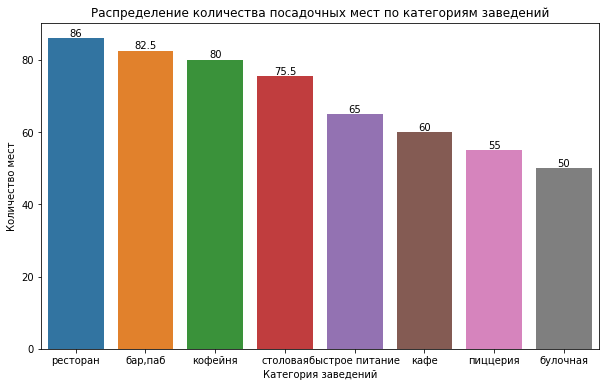

In [56]:
# Сгруппируем данные по категориям и выявим по каждой из них наиболее типичное количество посадочных мест:
df_agg = new_df.groupby('category')['seats'].agg(pd.Series.median).sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))

# Построим столбчатую диаграмму:
bx = sns.barplot(data=df_agg, x='category', y='seats')

plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Категория заведений')
plt.ylabel('Количество мест')
bx.bar_label(bx.containers[0])



plt.show()

*График наглядно демонстрирует типичное расспределение количества посадочных мест по каждой категории заведений:* ***наибольшее количество - в ресторанах и  барах/пабах - около 85, а меньше всего - в пиццериях (55) и булочных (50)***.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Рассмотрим различия усреднённых рейтингов для разных типов общепита.

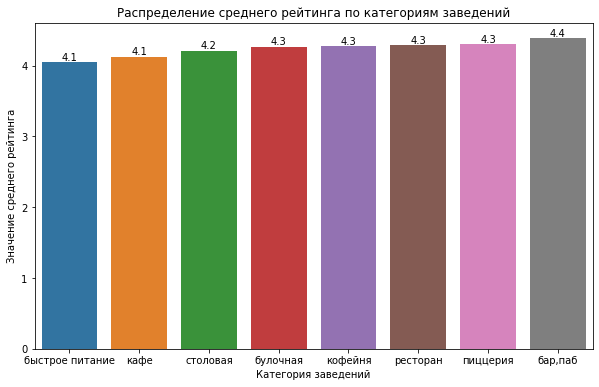

In [57]:
# Сгруппируем данные по категориям заведений с вычислением среднего рейтинга:
df_agg = new_df.groupby('category')['rating'].agg('mean').sort_values().reset_index()
plt.figure(figsize=(10,6))

# Построим столбчатую диаграмму:
bx = sns.barplot(data=df_agg, x='category', y='rating')

plt.title('Распределение среднего рейтинга по категориям заведений')
plt.xlabel('Категория заведений')
plt.ylabel('Значение среднего рейтинга')
bx.bar_label(bx.containers[0], fmt='%.1f')



plt.show()

*Видно, что наиболее высокий средний рейтинг по оценкам пользователей в Яндекс Картах принадлежит **барам и пабам с оценкой 4.4**. Также, всего на одну десятую от них отстают **пиццерии, рестораны, кофейни и булочные - 4.3**.*

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, что заведение работает круглосуточно. Выберим самую сильную связь и проверим её.

In [58]:
# Вычисляем корреляционную матрицу по выборочным столбцам датафрейма с использованием коэфф-та phi_k:
corr_matrix_1 = new_df[['category','district','chain','seats','rating','price','is_24_7']].phik_matrix(interval_cols=['rating']).sort_values(by='rating', ascending=False)

# Выведем результат:
print('Матрица корреляции относительно рейтинга заведений:')
print(corr_matrix_1) 

Матрица корреляции относительно рейтинга заведений:
          category  district     chain     seats    rating     price   is_24_7
rating    0.198763  0.189453  0.118785  0.226708  1.000000  0.253083  0.161010
price     0.498190  0.205246  0.152738  0.242045  0.253083  1.000000  0.118810
seats     0.289863  0.732054  0.140426  1.000000  0.226708  0.242045  0.095044
category  1.000000  0.174517  0.265574  0.289863  0.198763  0.498190  0.244814
district  0.174517  1.000000  0.064417  0.732054  0.189453  0.205246  0.076357
is_24_7   0.244814  0.076357  0.043357  0.095044  0.161010  0.118810  1.000000
chain     0.265574  0.064417  1.000000  0.140426  0.118785  0.152738  0.043357


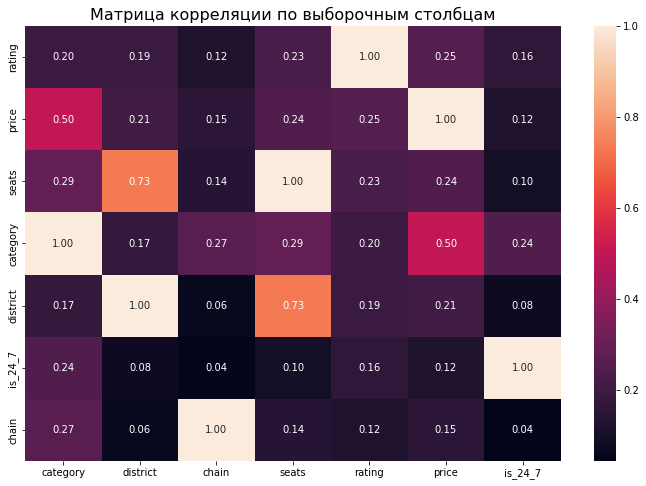

In [59]:
# Создадим тепловую карту для лучшего восприятия:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_1, annot=True, fmt='.2f', cbar=True)
plt.title('Матрица корреляции по выборочным столбцам', fontsize=16)
plt.show()

*Судя по значениям визуализации, отметим, что наиболее сильная положительная связь рейтинга заведений наблюдается с уровнем цен в заведениях, вероятней, чем доступней цены, тем выше рейтинг заведения. Также, умеренные положительные взаимосвязи наблюдаются с количеством посадочных мест, категориями заведений и местом расположения.* 

Рассмотрим детальней данные взаимосвязи с помощью других методов визуалицазии.


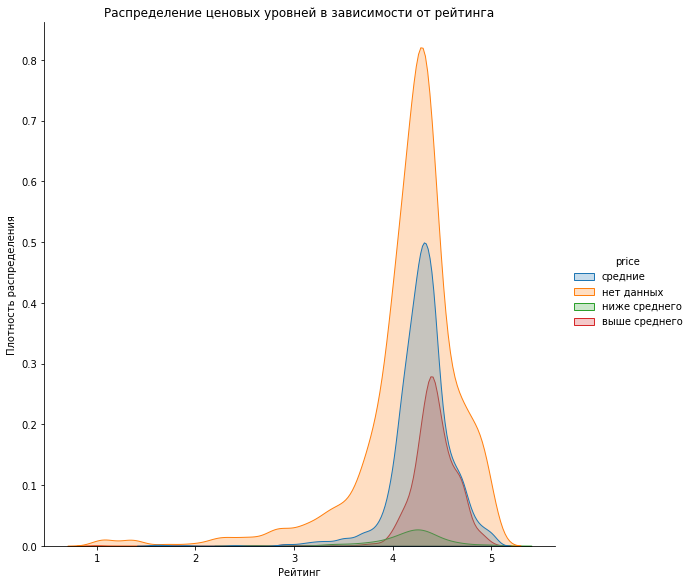

In [60]:
# Построим график плотности:
sns.displot(new_df, x = 'rating', hue = 'price', kind = 'kde', fill = True, height=8)
plt.title('Распределение ценовых уровней в зависимости от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность распределения')
plt.show()

*На графике видно, что наибольшее количество оценок пользователей имеют заведения со **средней ценовой категорией**. На втором месте - с ценами выше средних.*

Рассмотрим зависимость рейтинга от количества посадочных мест на фоне категорий заведений.

In [61]:
# Вычислим средние значения посадочных мест и рейтинга заведений по их категориям:
d = new_df.groupby('category', as_index = False).agg({'seats': 'mean', 'rating': 'mean'}).sort_values(by='seats', ascending=False)
display(d)

,category,seats,rating
0,"бар,паб",124.532051,4.387712
6,ресторан,121.869874,4.290348
4,кофейня,111.199734,4.277282
7,столовая,99.75,4.211429
2,быстрое питание,98.891117,4.050249
3,кафе,97.365653,4.124285
5,пиццерия,94.496487,4.301264
1,булочная,89.385135,4.268359


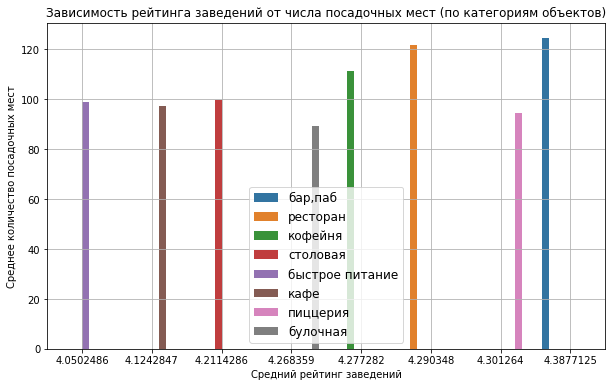

In [62]:
# Зададим размер графика:
plt.figure(figsize=(10, 6))

# Построим визуализацию:
sns.barplot(x='rating', y='seats', data=d, hue='category')

# Сформируем заголовок графика и подписи осей:
plt.title('Зависимость рейтинга заведений от числа посадочных мест (по категориям объектов)')
plt.xlabel('Средний рейтинг заведений')
plt.ylabel('Среднее количество посадочных мест')

# Определим положение и размер шрифта легенды:
plt.legend(loc='best', fontsize=12)
plt.grid()

plt.show()

*Видно, что количество посадочных мест тоже влияет на рейтинг заведения - чем больше число мест, тем выше рейтинг. Можно предположить, что с учетом категории объекта **наибольшей популрностью пользуются более масштабные заведения**: бары/пабы, рестораны и кофейни.*

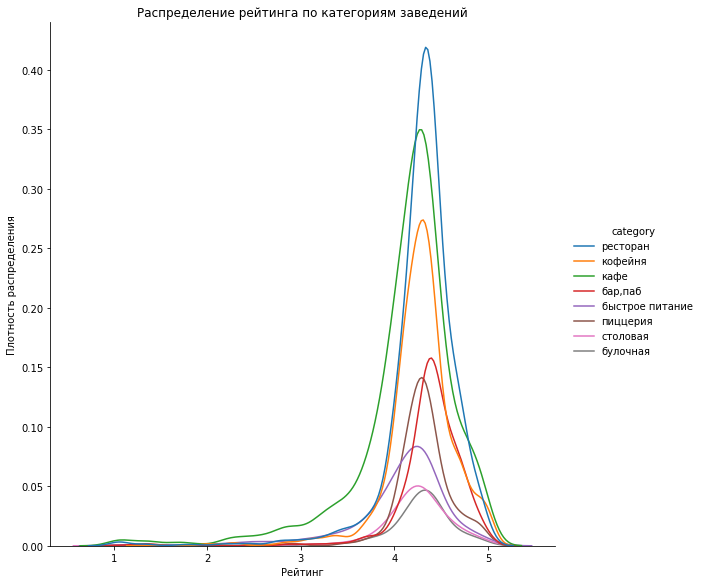

In [63]:
# Построим график распределения:
sns.displot(new_df, x = 'rating', hue = 'category', kind = 'kde', height=8)
plt.title('Распределение рейтинга по категориям заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность распределения')
plt.show()

*Видно, что наиболее высокую плотность скопления положительного рейтинга имеют **рестораны, кафе и кофейни**. Вероятно,  эти заведения посещают чаще всего и они наиболее популярны среди населения.*

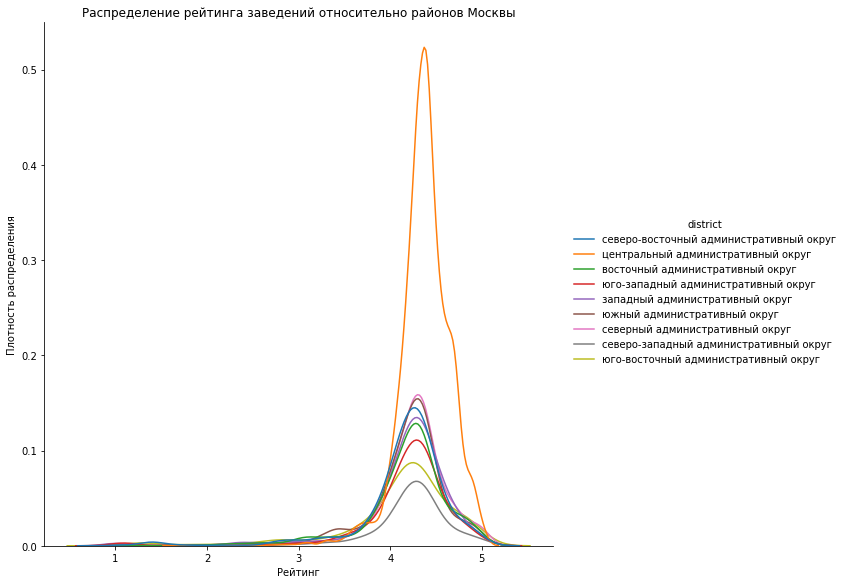

In [64]:
# Построим график распредеения плотности:
sns.displot(new_df, x = 'rating', hue = 'district', kind = 'kde', height=8)
plt.title('Распределение рейтинга заведений относительно районов Москвы')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность распределения')
plt.show()

*На графике хорошо видно, что с большим отрывом по количеству оценок пользователей Яндекс Карт лидируют заведения, расположенные в **Центральном округе Москвы**.*

---

### Задача 7

Сгруппируем данные по названиям заведений и найдём топ-15 популярных сетей в Москве, то есть количество заведений этой сети в регионе. Для них посчитаем значения среднего рейтинга. Определим категории данных заведений. Результат визуализируем.

In [65]:
# Вычислим max количество заведений в зависимости от региона и их средний рейтинг, 
# сгруппировав заведения по названию и категориям. Выведем ТОП-15 популярных сетей:
df_agg = new_df.query('chain == 1').groupby(['name', 'category'], as_index = False).agg({'district': 'count',
                                                                                     'rating': 'mean'}).sort_values(by='district', ascending=False).head(15)
display(df_agg)

,name,category,district,rating
1129,ШОКОЛАДНИЦА,кофейня,119,4.178151
499,ДОМИНО'С ПИЦЦА,пиццерия,76,4.169737
492,ДОДО ПИЦЦА,пиццерия,74,4.286487
205,ONE PRICE COFFEE,кофейня,71,4.064789
1145,ЯНДЕКС ЛАВКА,ресторан,69,3.872464
72,COFIX,кофейня,65,4.075385
241,PRIME,ресторан,49,4.114285
620,КОФЕПОРТ,кофейня,42,4.147619
635,КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ,кафе,39,4.394872
966,ТЕРЕМОК,ресторан,36,4.105556


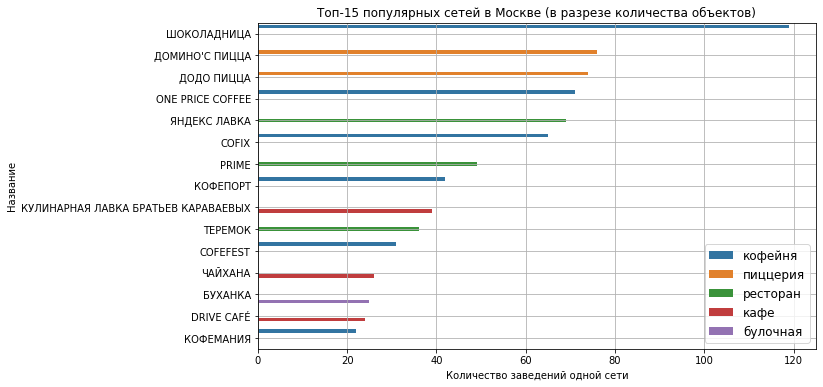

In [66]:
# Зададим размер графика:
plt.figure(figsize=(10, 6))

# Построим линейчатый график:
sns.barplot(x='district', y='name', data=df_agg, hue='category')

# Сформируем заголовок графика и подписи осей:
plt.title('Топ-15 популярных сетей в Москве (в разрезе количества объектов)')
plt.xlabel('Количество заведений одной сети')
plt.ylabel('Название')

# Определим положение и размер шрифта легенды:
plt.legend(loc='lower right', fontsize=12)
plt.grid()

plt.show()

*Исходя из полученных данных, самой масштабной сетью заведений является **кофейня "Шоколадница"** - 119 объектов, она по количеству заведений в регионе с явным отрывом опережает остальные сети: пиццерию "Домино'с пицца", "Додо пицца" и т.д. Хотя средний рейтинг "Шоколадницы" среди прочих 15-ти заведений не самый высокий (4,2) в сравнении, например, с кофейней "Кофемания" (4,5). Также, из графика видно, что больше всего объектов одной сети встречается в категории "Кофейня".* 

Визуализируем распределение средних рейтингов для категорий заведений внутри ТОП-15. 

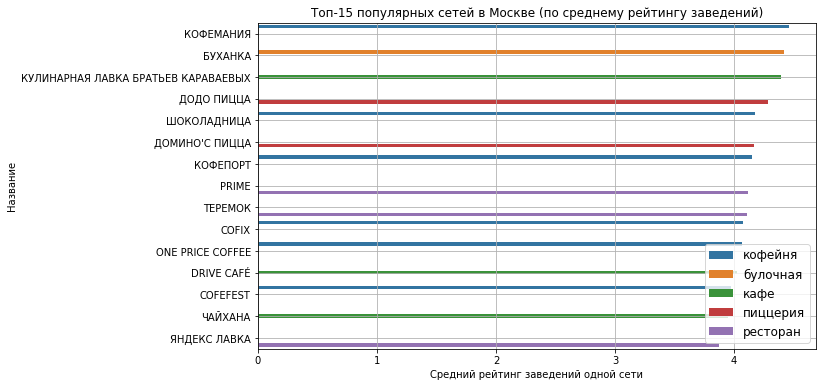

In [67]:
# Зададим размер графика:
plt.figure(figsize=(10, 6))

# Построим линейчатый график:
sns.barplot(x='rating', y='name', data=df_agg.sort_values(by='rating', ascending=False), hue='category')

# Сформируем заголовок графика и подписи осей:
plt.title('Топ-15 популярных сетей в Москве (по среднему рейтингу заведений)')
plt.xlabel('Средний рейтинг заведений одной сети')
plt.ylabel('Название')

# Определим положение и размер шрифта легенды:
plt.legend(loc='lower right', fontsize=12)
plt.grid()

plt.show()

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Выясним, как удалённость от центра влияет на цены в заведениях. Результат сопроводим визуализацией.


In [68]:
# Выведем значение среднего чека в заведениях, сгрупировав данные по районам Москвы:  
group_bill = new_df.groupby('district')['middle_avg_bill'].median().reset_index().sort_values(by='middle_avg_bill',ascending=False)
display(group_bill)

,district,middle_avg_bill
1,западный административный округ,1000.0
5,центральный административный округ,1000.0
4,северо-западный административный округ,700.0
2,северный административный округ,650.0
7,юго-западный административный округ,600.0
0,восточный административный округ,575.0
3,северо-восточный административный округ,500.0
8,южный административный округ,500.0
6,юго-восточный административный округ,450.0


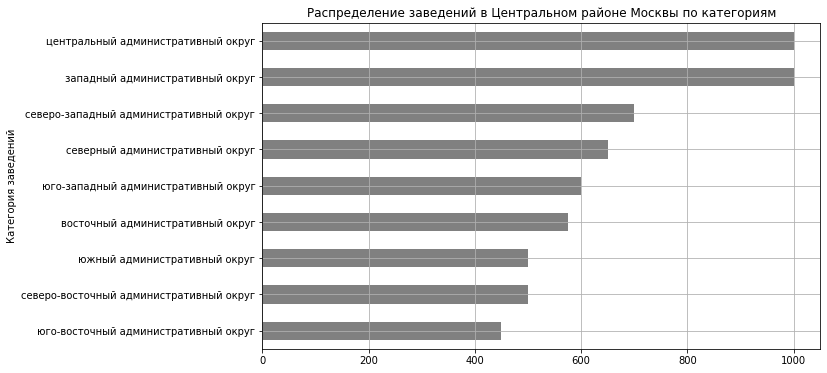

In [69]:
# Построим линейчатый график:
new_df.groupby('district')['middle_avg_bill'].median().sort_values().plot(kind='barh', 
                title='Распределение заведений в Центральном районе Москвы по категориям', 
                ylabel='Количество объектов', xlabel='Категория заведений',
                legend=False, rot=0, color='gray', figsize=(10, 6))
plt.grid()
plt.show()

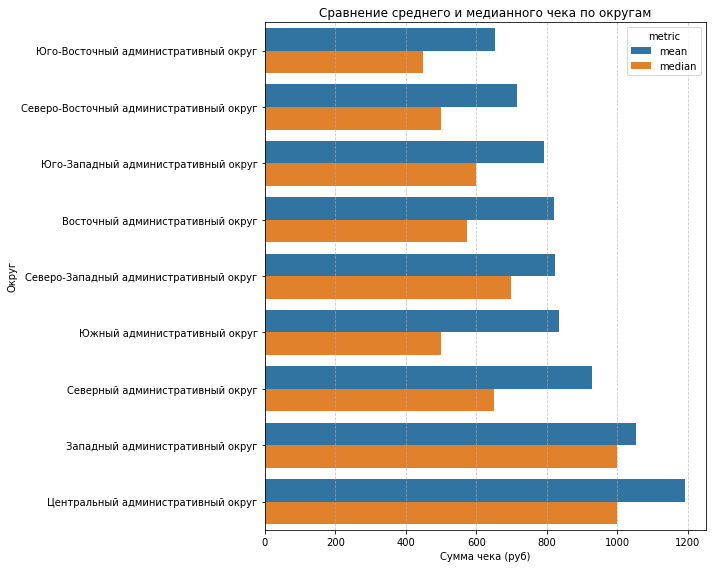

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка и объединение данных
df_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')
df = pd.merge(df_info, df_price, on='id', how='left')

# Группировка и агрегация
grouped_df = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).reset_index()

# Преобразуем в длинный формат для seaborn
melted_df = pd.melt(grouped_df, 
                    id_vars='district', 
                    value_vars=['mean', 'median'],
                    var_name='metric', 
                    value_name='value')

# Сортируем по 'mean' (можно заменить на 'median', если нужно)
sorted_districts = grouped_df.sort_values('mean')['district']

# Приводим порядок округов в melted_df к отсортированному
melted_df['district'] = pd.Categorical(
    melted_df['district'], 
    categories=sorted_districts,  # задаем порядок сортировки
    ordered=True
)

# Строим barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=melted_df, 
            x='value', 
            y='district', 
            hue='metric',
            palette=['#1f77b4', '#ff7f0e'])

# Настраиваем оформление
plt.title('Сравнение среднего и медианного чека по округам')
plt.xlabel('Сумма чека (руб)')
plt.ylabel('Округ')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Судя по расчетным данным и результатам визуализации, видно, что чем больше удаленность от центра, тем ниже средний чек заведения. **Самый высокий уровень цен наблюдается в Центральном и Западном административных округах**, где средний чек составляет 1000 руб. **Самый низкий чек - в Юго-Восточном административном округе порядка 450 руб**.*

---

### Промежуточный вывод

**Подведём итоги детального исследования заведений общепита г.Москва:**

* По категориям заведений в данном регионе лидирующие позиции занимают кафе, рестораны и кофейни.

* Основная часть объектов общественного питания расположена в Центральном округе Москвы, из которых преобладают рестораны, кафе и кофейни.

* Соотношение сетевых и несетевых заведений составляет 38% к 62%, то есть несетевых объектов больше, примерно, в два раза. Анализ сетевых и несетевых заведений в разрезе категорий показывает преимущество несетевых объектов практически в каждой категории. 

* Определено наиболее типичное число посадочных мест в зависимости от категории заведений.

* Наиболее значимые корреляционные взаимосвязи рейтинга заведений наблюдаются с уровнями цен, количеством посадочных мест, категориями и месторасположением заведений.

* Вывеведено ТОП-15 самых популярных заведений по количеству и среднему рейтингу, где лидером стала кофейня "Шоколадница" - 119 объектов.

* Средний чек заведения зависит района Москвы - чем больше удаленность от центра, тем дешевле. Самые высокие цены наблюдаются в Центральном и Западном окргах Москвы.

## Итоговый вывод и рекомендации


Анализируя всю проделанную работу с исходными данными датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`, а также по результатам проведённого исследовательского анализа данных сформулируем основной вывод и рекомендации для заказчика:


1. После объединения датасетов в единый датафрейм, с которым была проведена работа по преобработке данных: процесс оптимизации размерности данных и их преобразование, выявление и дальнейшая работа с пропусками и дубликатами, а также добавления нового столбца, общее количество строк датафрейма составило 8406 и 14 столбцов.


2. Основную нишу на рынке общественного питания г. Москва занимают кафе 2378 заведений, далее рестораны 2043 заведения, на третьем месте кофейни 1413. Меньше всего булочных 256 и столовых - 315.


3. По количеству посадочных мест выходят на первое место рестораны, на второе поместились кафе, на третьем кофейни. В ресторанах в среднем 115, в барах/пабах - 110, в кофейнях - 100, быстрое питание - 96, меньше всего в булочных - 86 мест. Наиболее типичное количество посадочных мест для ресторанов - 86 мест, баров/пабов - 80, кофеен - 78, столовых - 75, заведений быстрого питания - 65, кафе - 60, пиццерий - 52, булочных - 50 посадочных мест. 


4. Количество сетевых заведений из общего числа (8406) - 3205, что составляет 38%. Несетевых, почти, в два раза больше.


5. Чаще всего, являются сетевыми заведениями булочные - 61%, пиццерии - 52% и кофейни - 51%, из них на рынке общепита, примерно, половина сетевых и несетевых; а несетевыми чаще являются следующие заведения (в порядке убывая): бары,пабы  - 78%, столовые - 72%, кафе - 67% и рестораны - 64%.


6. Лидером по количеству заведений в регионе является сеть кофеин "Шоколадница" - 119 объектов, далее в рейтинге - пиццерии "Домино'с Пицца" и "Додо Пицца".


7. По количеству заведений всех категорий лидирует Центральный административный округ Москвы (2242 объекта), а меньше всего заведений - в Северо-Западном административном округе (409 объектов).


8. Значения среднего рейтинга по категориям общепита различаются слабо, и находятся в диапазоне от 4,1 до 4,4 баллов. Значит,  пользователи чаще ставят оценку выше 4.


9. Удалённость от центра влияет на средний чек товаров, а именно: чем дальше от центра Москвы расположены заведения, тем ниже цены. В Центральном и Западном административных округах средний чек составляет 1000 руб., а самый низкий чек - в Юго-Восточном административном округе - 450 руб.

**В качестве рекомендаций** на основании вышеизложенного можно предположить, что открытие заведения общественного питания и его дальнейшее развитие будет зависеть от категории выбранного объекта и его месторасположения. Так, например, для открытия ресторана или кафе больше подойдет живописный тихий, а может наоборот - самый центр, но престижный район. Стиль заведения и его кухня должны быть на высоте и выделяться на фоне уже сложившейся немалой конкуренции в регионе. В общем, изначально объект должен быть харизматичным, что сразу должно привлечь как можно больше посетителей. Другое дело - заведения быстрого питания, столовые, кофейни, булочные. Здесь стоит обратить внимание на наиболее проходимые места с большим трафиком людей. Также кухне и качеству обслуживания, безусловно, стоит обратить особое внимание. По местурасположения, я считаю, следует присмотреться к Северо_Западному району Москвы, где средний чек составляет 700 руб. (3-е место после Центрального и Западного районов), а по количеству заведений всех категорий - последнее месте. Я предполагаю, что для большего понимания ситуации, необходимо более детально изучить истории развития самых популярных заведений из категории ТОП-15.

